In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

In [2]:
with open("datasets/processed/script_dataframe_emotion.pickle","rb") as f:
    dataframe = pickle.load(f)
data = list(np.array(dataframe, dtype=list))
data.sort(key = lambda x: int(x[1][1:]))
data.sort(key = lambda x: int(x[0][1:]))
dataframe = pd.DataFrame(data, columns=list(dataframe.columns))
dataframe.head(5)

,id,conversation_id,meta.movie_idx_x,speaker,meta.character_name,meta.gender,reply_to,text,cleaned_text,decision_tree,MLP,random_forest,logistic_regression,k_n_n,rnn LSTM
0,L49,L49,m0,u0,BIANCA,f,None,Did you change your hair?,do you change your hair,6,8,6,4,6,4
1,L50,L49,m0,u3,CHASTITY,?,L49,No.,no,4,4,4,4,3,4
2,L51,L49,m0,u0,BIANCA,f,L50,You might wanna think about it,you may wanna think about it,2,4,1,4,1,4
3,L59,L59,m0,u9,PATRICK,m,None,I missed you.,i miss you,6,4,6,4,6,6
4,L60,L59,m0,u8,MISS PERKY,?,L59,It says here you exposed yourself to a group o...,it say here you expose yourself to a group of ...,3,8,4,4,4,4


In [3]:
movie_id = "m3"
print("Possible speakers: " + str(set(list(dataframe.loc[dataframe['meta.movie_idx_x'] == movie_id]['speaker']))))

Possible speakers: {'u56', 'u54', 'u52', 'u49', 'u58', 'u61', 'u57', 'u60', 'u59', 'u55', 'u53', 'u50', 'u51'}


In [4]:
speaker_id = "u50"
movie_df = dataframe.loc[dataframe["meta.movie_idx_x"] == movie_id]
character_df = movie_df.loc[movie_df["speaker"] == speaker_id]
character_df.head(5)

,id,conversation_id,meta.movie_idx_x,speaker,meta.character_name,meta.gender,reply_to,text,cleaned_text,decision_tree,MLP,random_forest,logistic_regression,k_n_n,rnn LSTM
1734,L3942,L3942,m3,u50,BOWMAN,m,None,"Hi. Frank... coming in, please.",hi frank come in please,4,4,8,4,4,4
1736,L3944,L3942,m3,u50,BOWMAN,m,L3943,Okay.,okay,4,4,4,4,4,4
1739,L3964,L3963,m3,u50,BOWMAN,m,L3963,"Sure, what is it?",sure what is it,1,4,8,4,0,4
1741,L3966,L3963,m3,u50,BOWMAN,m,L3965,What's up?,what s up,1,4,4,4,7,4
1743,L3968,L3963,m3,u50,BOWMAN,m,L3967,Yes?,yes,4,4,4,4,4,4


In [5]:
def get_emotion_percentage(vec):
    labels = set(vec)
    percentage = []
    for l in labels:
        percentage.append(len([x for x in vec if x == l]) * 100 / len(vec))
    return percentage

In [6]:
emotions = []
emotions.append(np.array(character_df['decision_tree']))
emotions.append(np.array(character_df['random_forest']))
emotions.append(np.array(character_df['MLP']))
emotions.append(np.array(character_df['k_n_n']))
emotions.append(np.array(character_df['logistic_regression']))
emotions.append(np.array(character_df['rnn LSTM']))

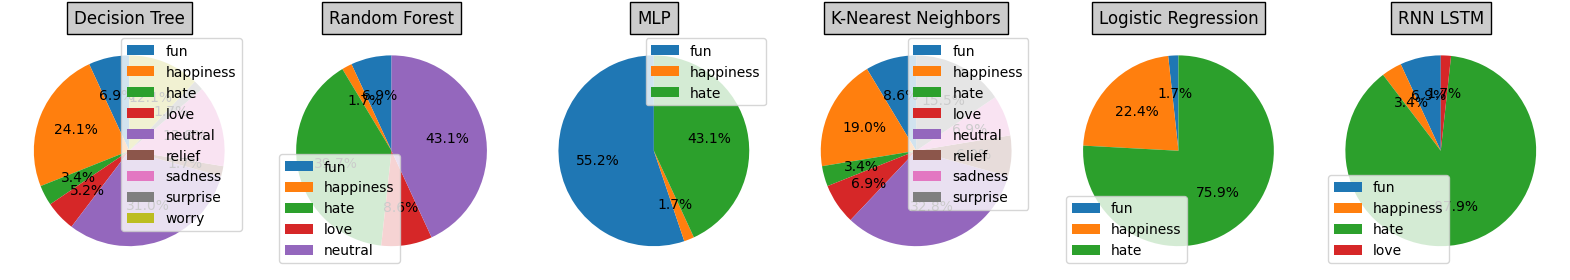

In [7]:
labels = ['fun','happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
titles = ["Decision Tree", "Random Forest", "MLP", "K-Nearest Neighbors", "Logistic Regression", "RNN LSTM"]

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

fig.subplots_adjust(hspace=0.5, wspace=0.1)

for i in range(6):
    sizes = get_emotion_percentage(emotions[i])
    fig.add_subplot(axs[i])
    plt.pie(sizes, autopct='%1.1f%%', startangle=90)
    plt.title(titles[i], bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(labels, loc="best")
    plt.axis('off')



In [8]:
def color(value):
    if(value == 0 or value == 'fun'):
        return "gold"
    if(value == 1 or value == 'happiness'):
        return "limegreen"
    if(value == 2 or value == 'hate'):
        return "maroon"
    if(value == 3 or value == 'love'):
        return "red"
    if(value == 4 or value == 'neutral'):
        return "gray"
    if(value == 5 or value == 'relief'):
        return "darkcyan"
    if(value == 6 or value == 'sadness'):
        return "navy"
    if(value == 7 or value == 'surprise'):
        return "orange"
    if(value == 8 or value == 'worry'):
        return "blueviolet"

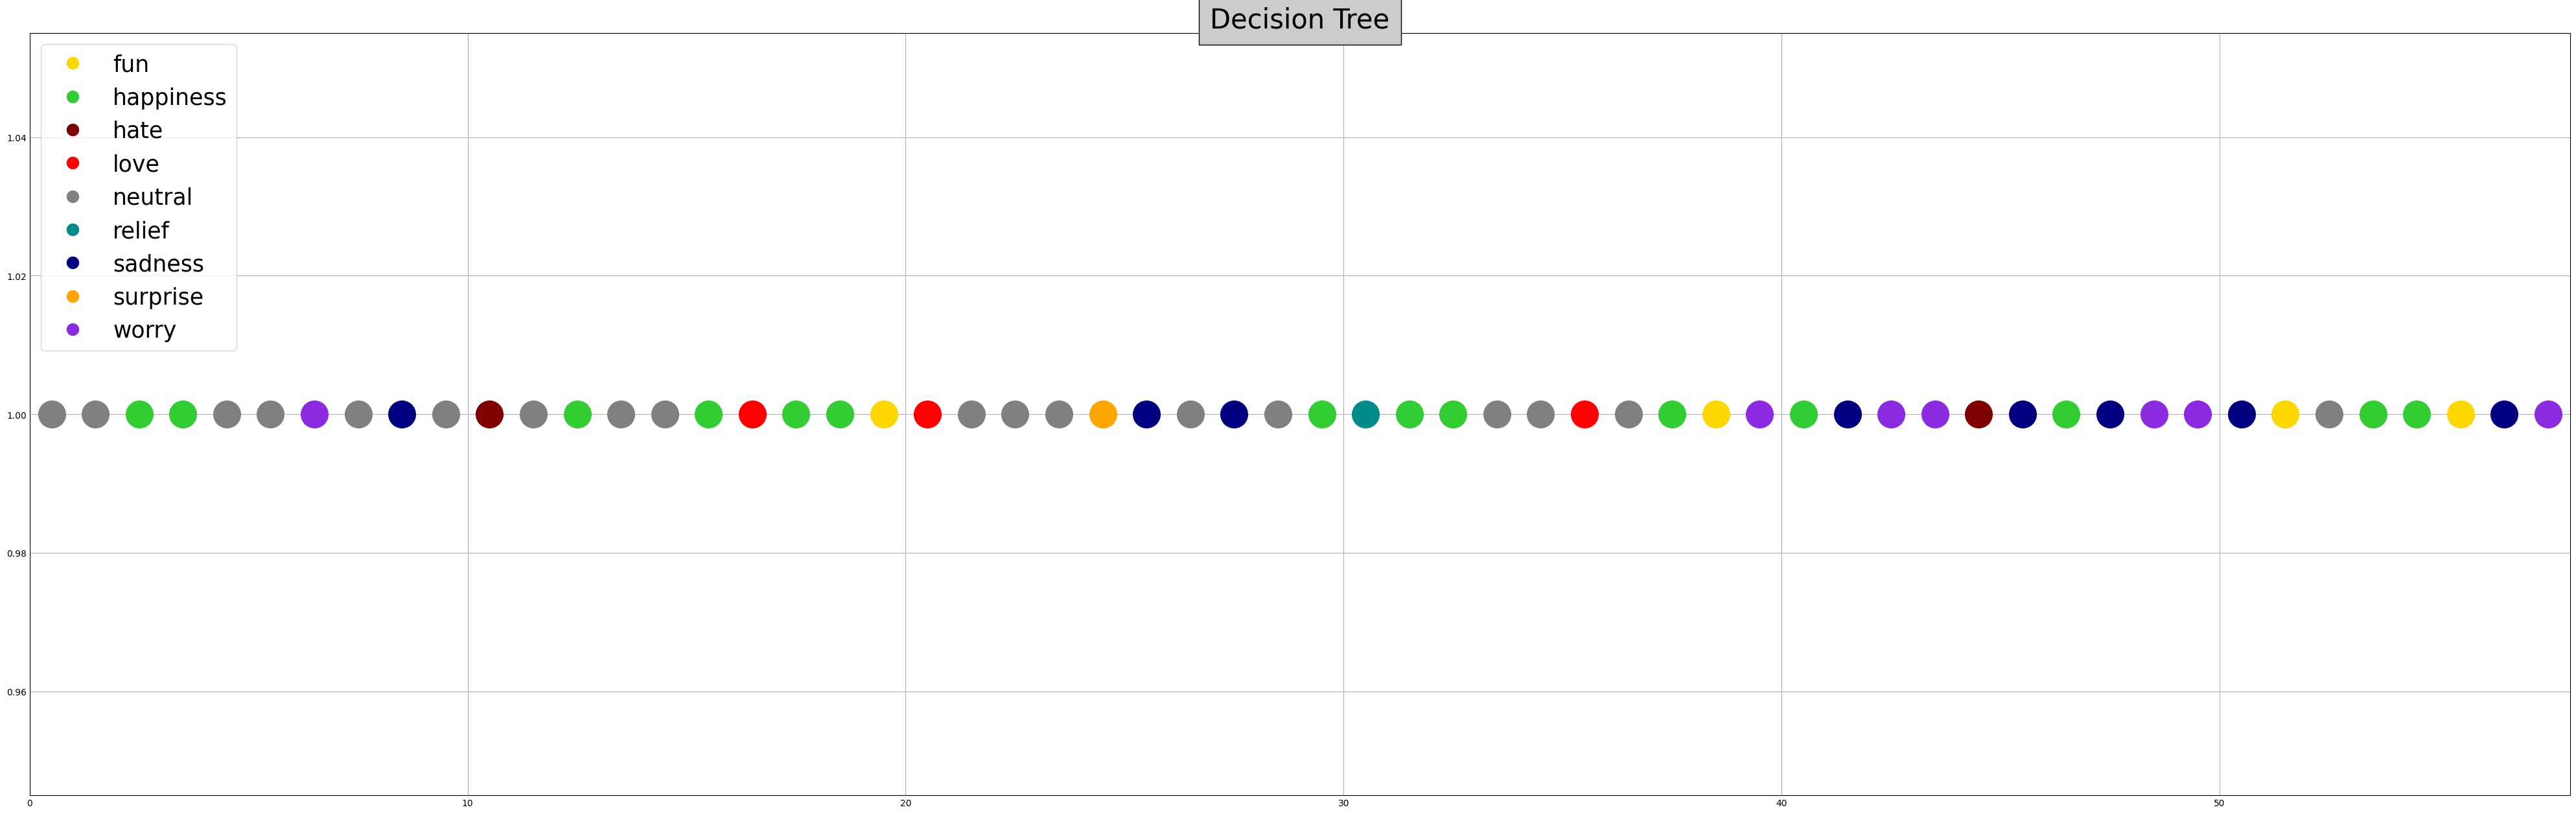

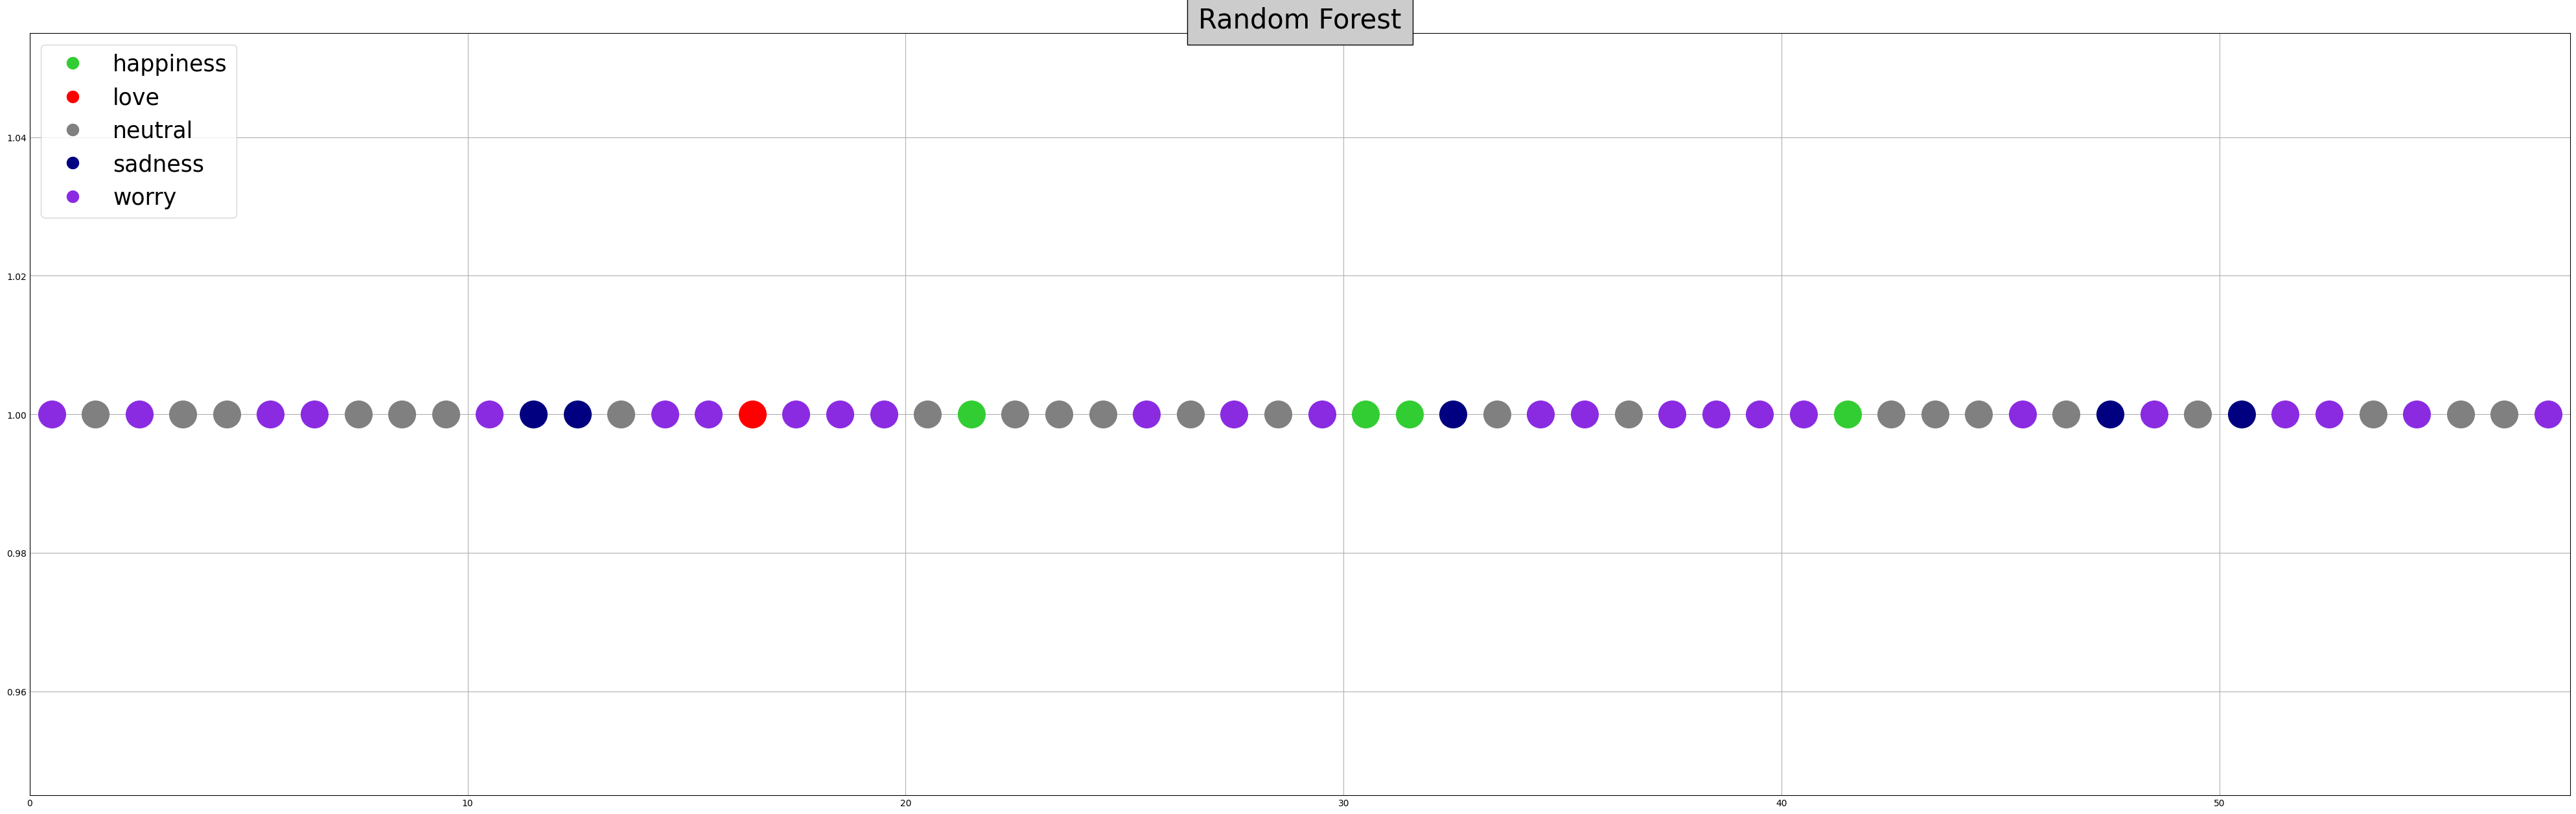

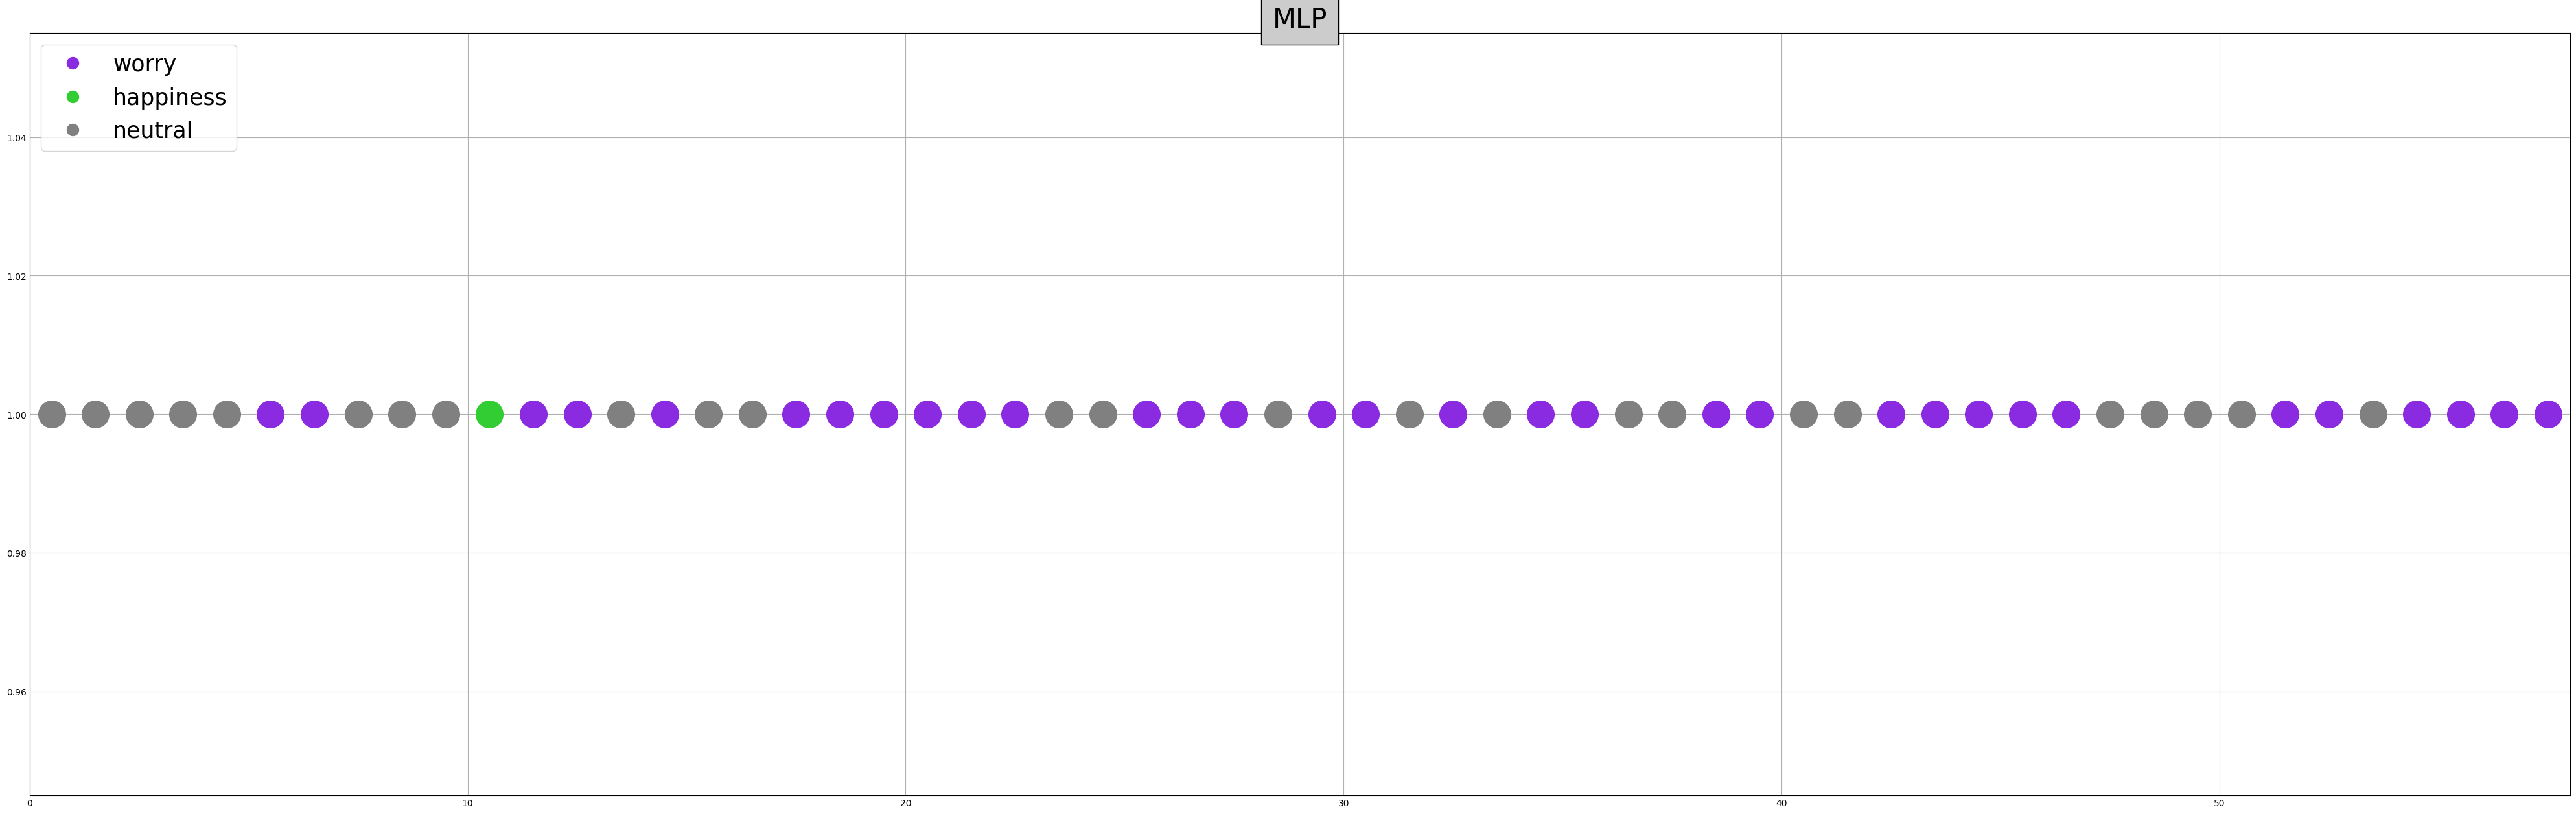

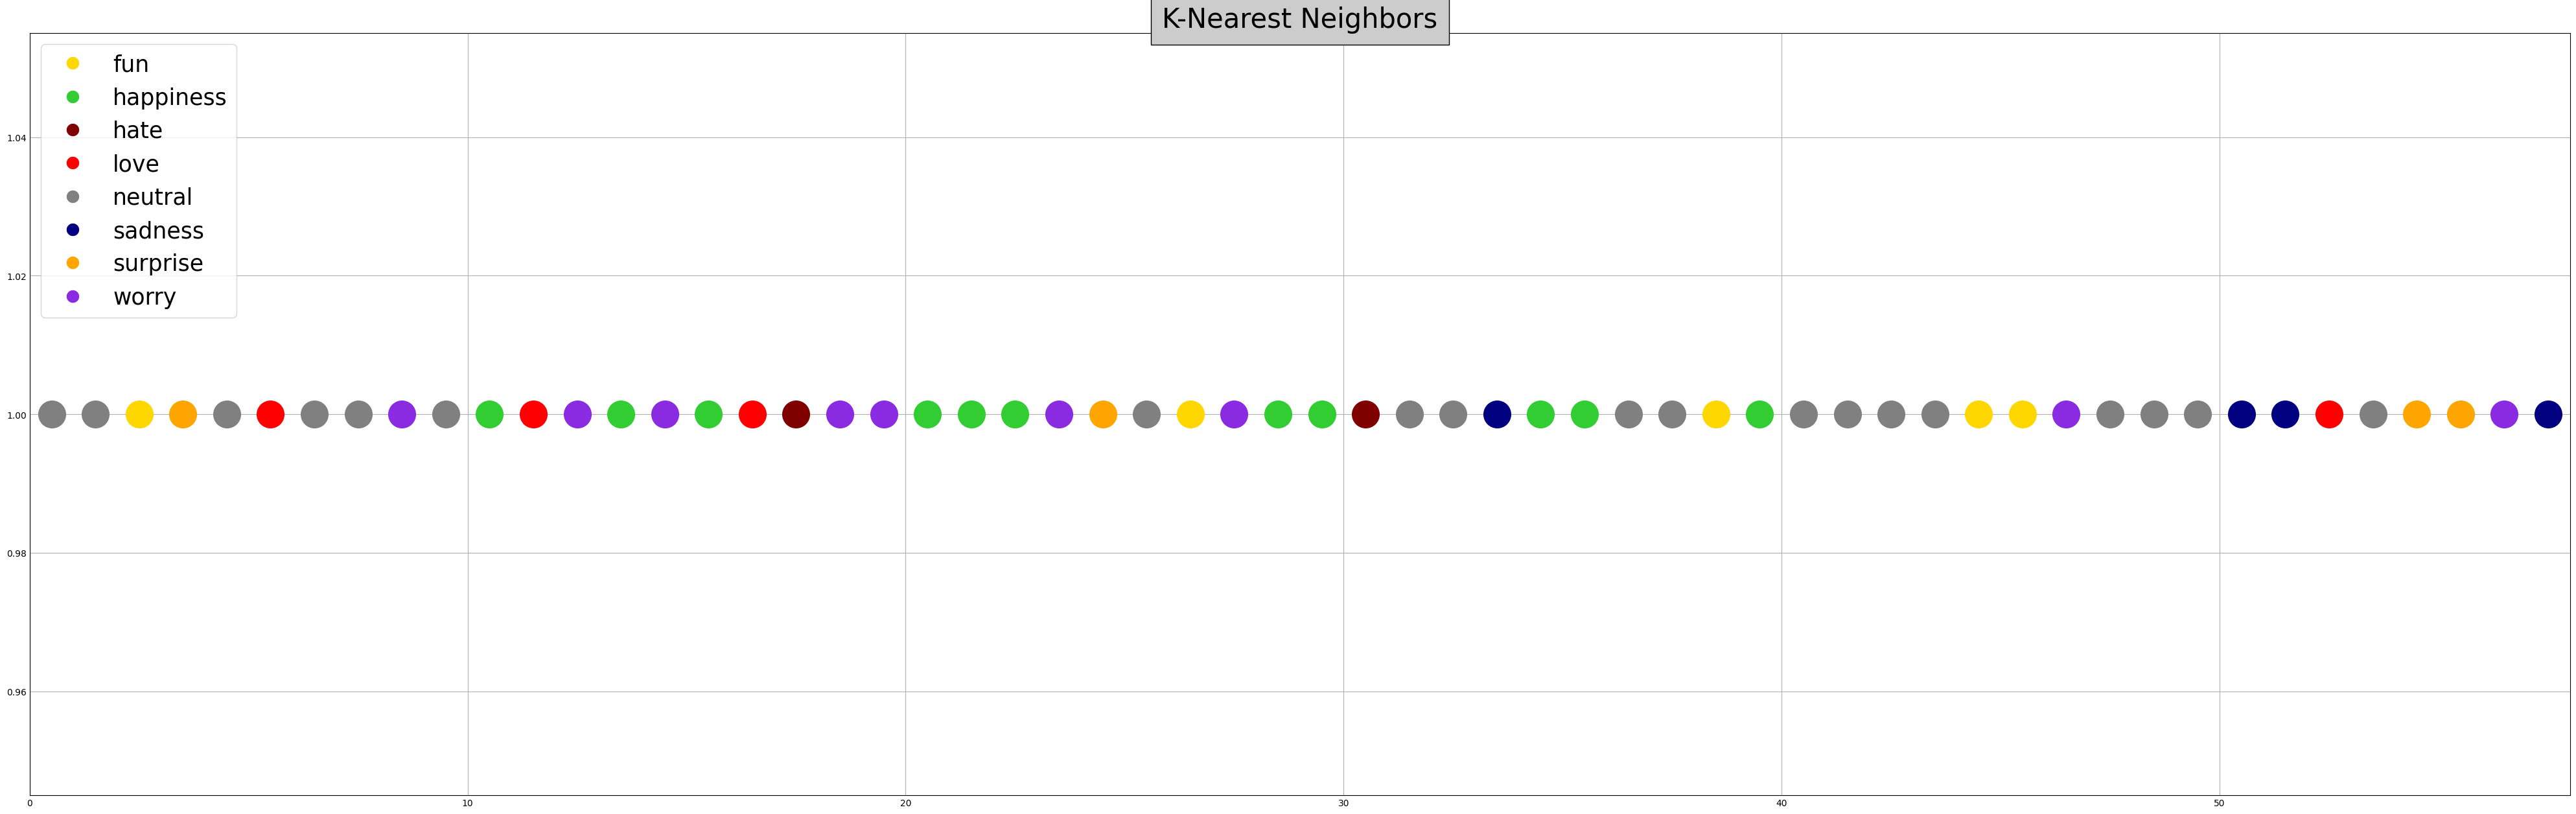

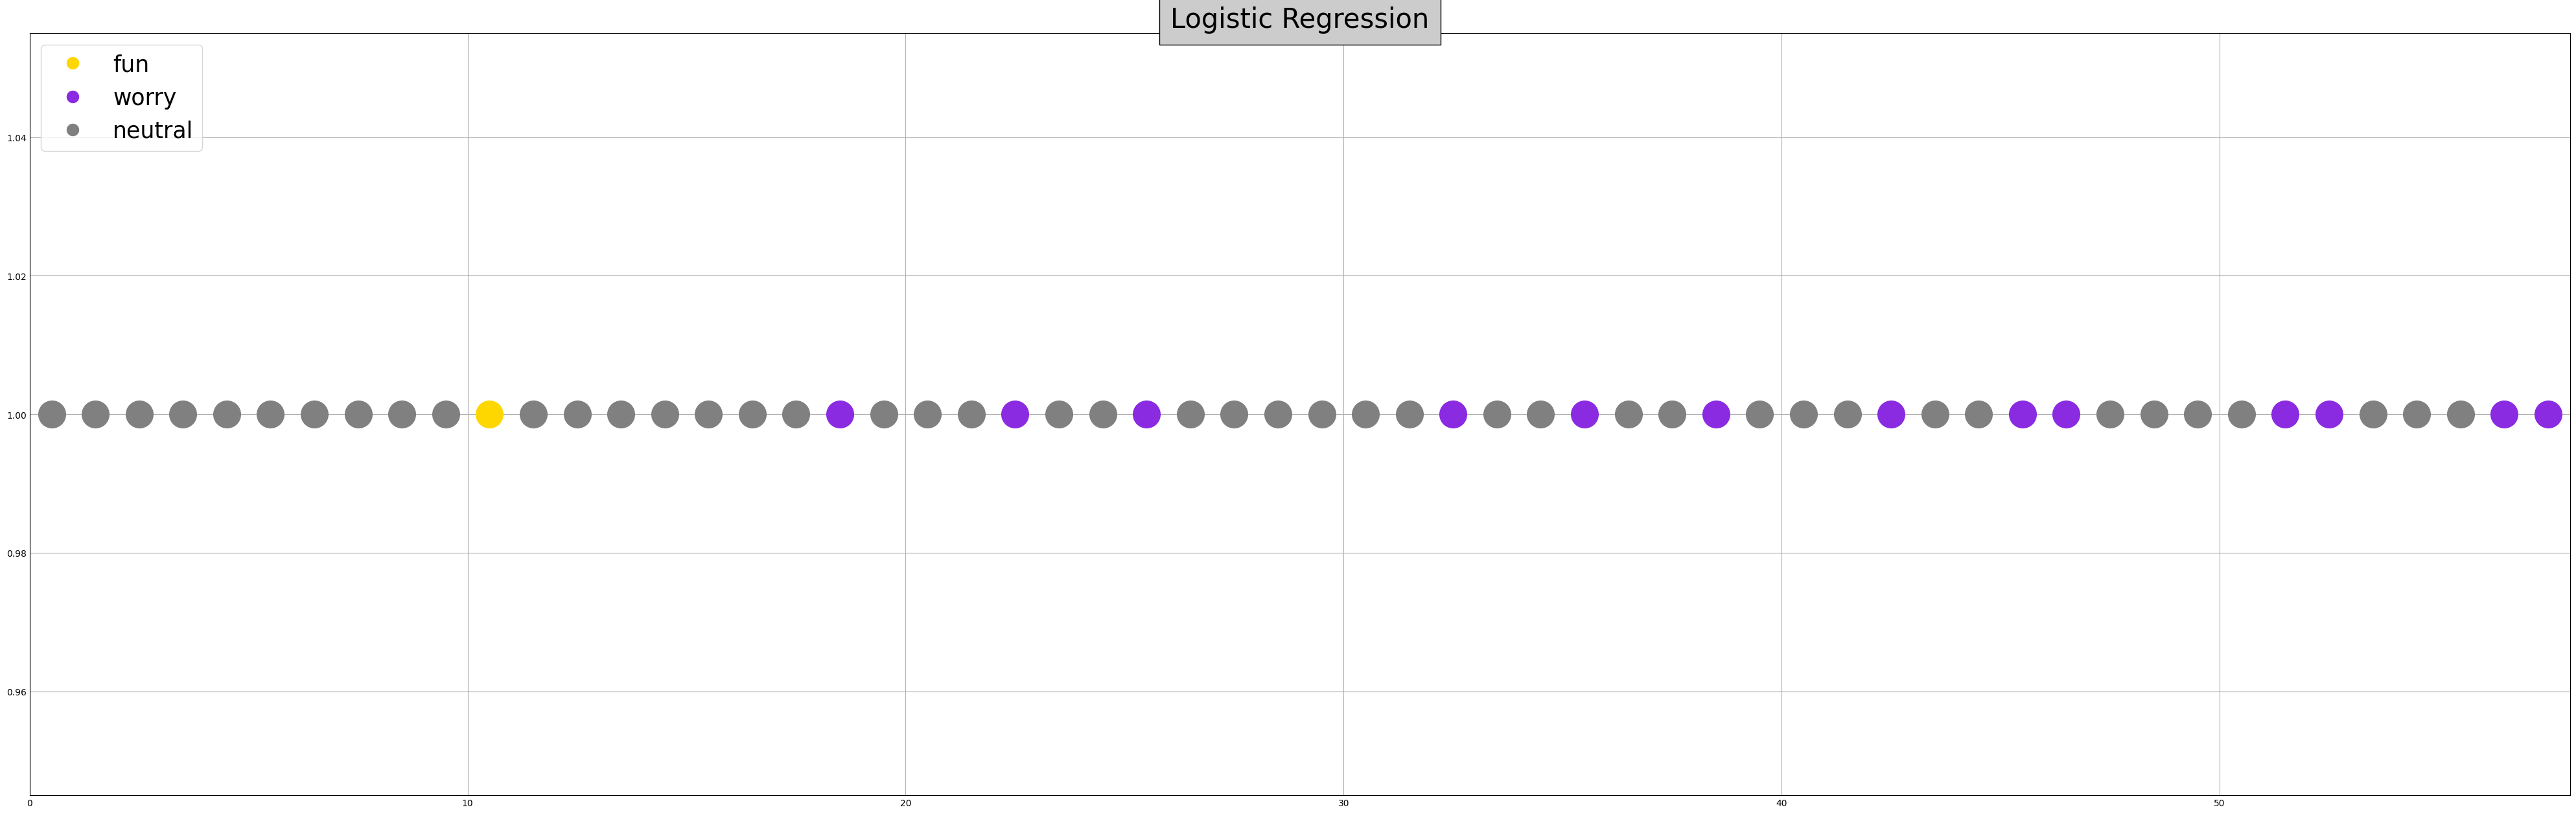

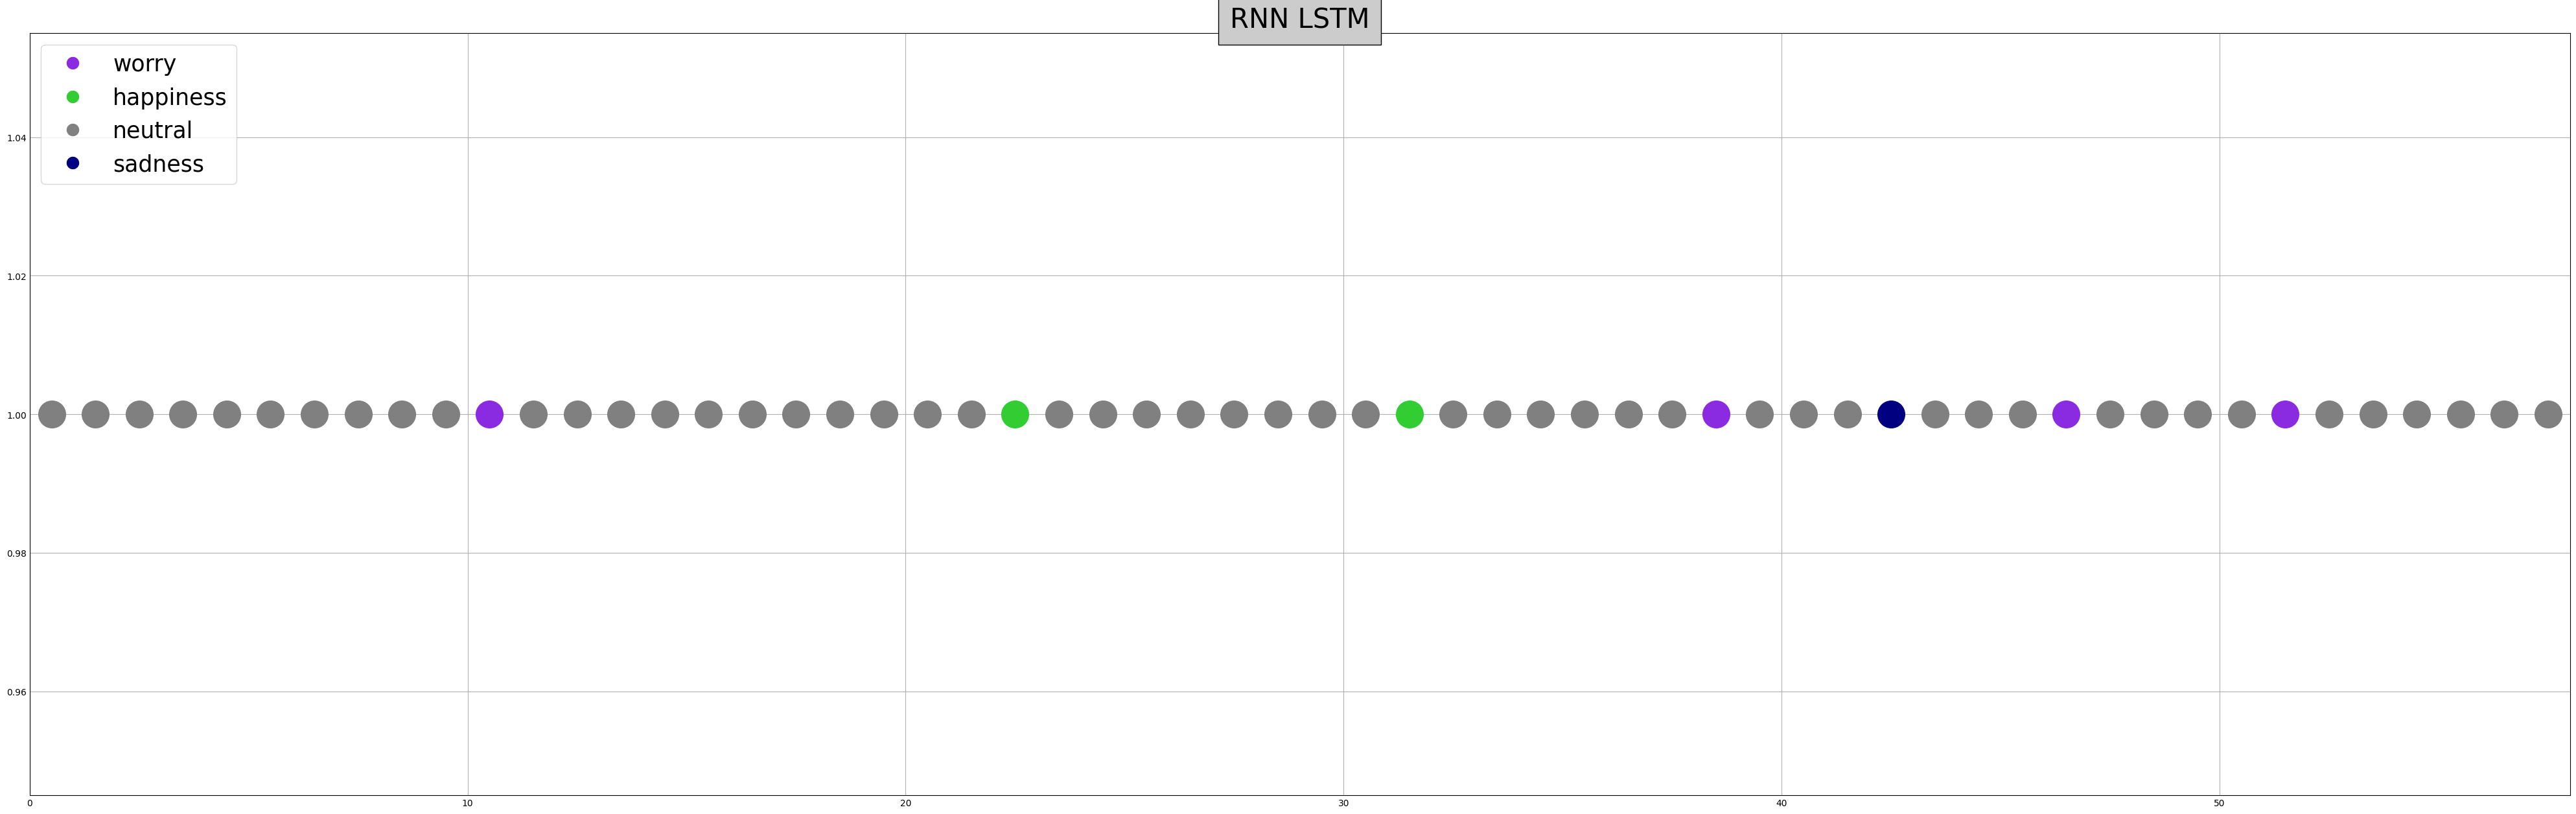

In [9]:
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

for i in range(6):
       x = 0.5 + np.arange(len(emotions[i]))
       y = [1]*len(emotions[i])
       fig, ax = plt.subplots(figsize=(40,12))
       plt.xlim(0,len(emotions[i]))
       ax.set_title(titles[i], bbox={'facecolor':'0.8', 'pad':5}, fontsize=30)
       colors = [color(x) for x in emotions[i]]
       legend_elements = [Line2D([0], [0], marker='o', markerfacecolor = color(x), color='w', markersize=15, label=labels[x]) for x in set(emotions[i])]
  
       ax.legend(handles=legend_elements, loc='upper left', prop={'size': 25})
       for k in range(len(emotions[i])):
              plt.plot(x[k], y[k], marker="o", markersize=30, color = colors[k])
       plt.show()

In [10]:
character_interaction_vec = np.array(character_df)
character_interaction_df = []
for v in character_interaction_vec:
    if not v[6] == None:
        character_interaction_df.append(np.array(dataframe.loc[dataframe["id"] == v[6]])[0])
        character_interaction_df.append(v)
        if len(np.array(dataframe.loc[dataframe["reply_to"] == v[0]])) > 0:
            character_interaction_df.append(np.array(dataframe.loc[dataframe["reply_to"] == v[0]])[0])
    else:
        character_interaction_df.append(v)
        if len(np.array(dataframe.loc[dataframe["reply_to"] == v[0]])) > 0:
            character_interaction_df.append(np.array(dataframe.loc[dataframe["reply_to"] == v[0]])[0])
character_interaction_df = pd.DataFrame(character_interaction_df, columns=list(dataframe.columns))
character_interaction_df.head(5)

,id,conversation_id,meta.movie_idx_x,speaker,meta.character_name,meta.gender,reply_to,text,cleaned_text,decision_tree,MLP,random_forest,logistic_regression,k_n_n,rnn LSTM
0,L3942,L3942,m3,u50,BOWMAN,m,None,"Hi. Frank... coming in, please.",hi frank come in please,4,4,8,4,4,4
1,L3943,L3942,m3,u60,POOLE,m,L3942,Right. Just a sec.,right just a sec,8,8,6,4,4,4
2,L3943,L3942,m3,u60,POOLE,m,L3942,Right. Just a sec.,right just a sec,8,8,6,4,4,4
3,L3944,L3942,m3,u50,BOWMAN,m,L3943,Okay.,okay,4,4,4,4,4,4
4,L3945,L3942,m3,u60,POOLE,m,L3944,"Okay, come on down.",okay come on down,1,8,4,4,1,4


In [11]:
ECI = defaultdict(lambda: defaultdict(list))
for i, v in enumerate(np.array(character_interaction_df)):
    if v[3] == speaker_id and v[6] != None and v[6] == np.array(character_interaction_df)[i-1][0]:
        for k in list(dataframe.columns)[9:]:
            ECI[np.array(character_interaction_df)[i-1][3]][k].append(list(character_interaction_df.loc[character_interaction_df['id'] == v[0]][k])[0])
    if v[3] == speaker_id and i<len(np.array(character_interaction_df))-1 and np.array(character_interaction_df)[i+1][6] == v[0]:
        for k in list(dataframe.columns)[9:]:
            ECI[np.array(character_interaction_df)[i+1][3]][k].append(list(character_interaction_df.loc[character_interaction_df['id'] == v[0]][k])[0])

In [12]:
for k, v in ECI.items():
    for k1, v1 in v.items():
        ECI[k][k1] = Counter(v1)

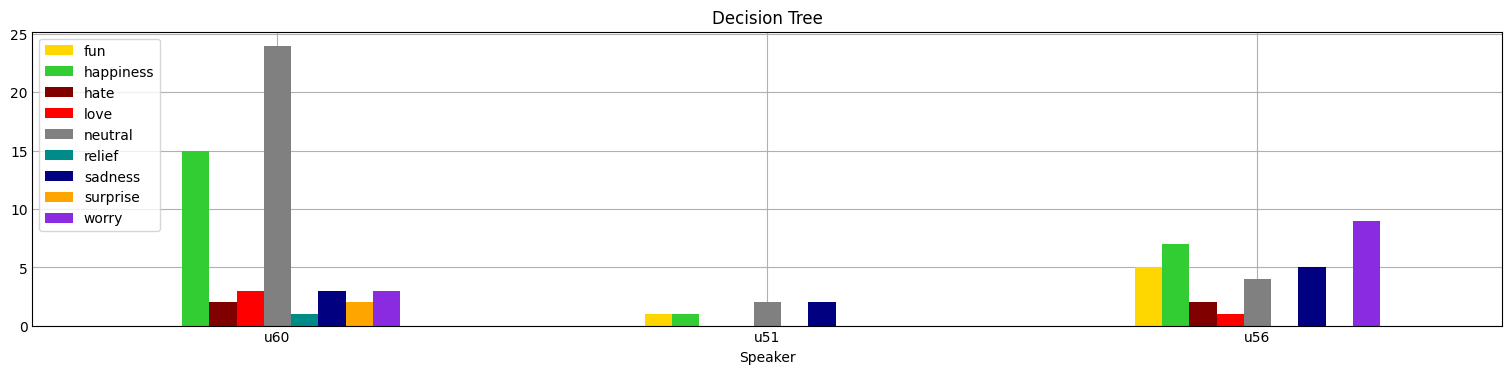

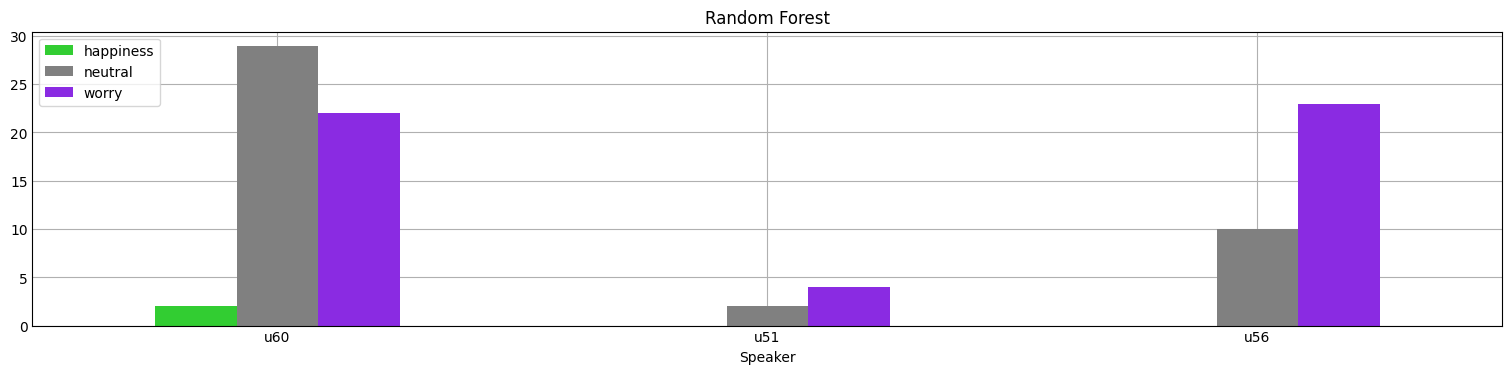

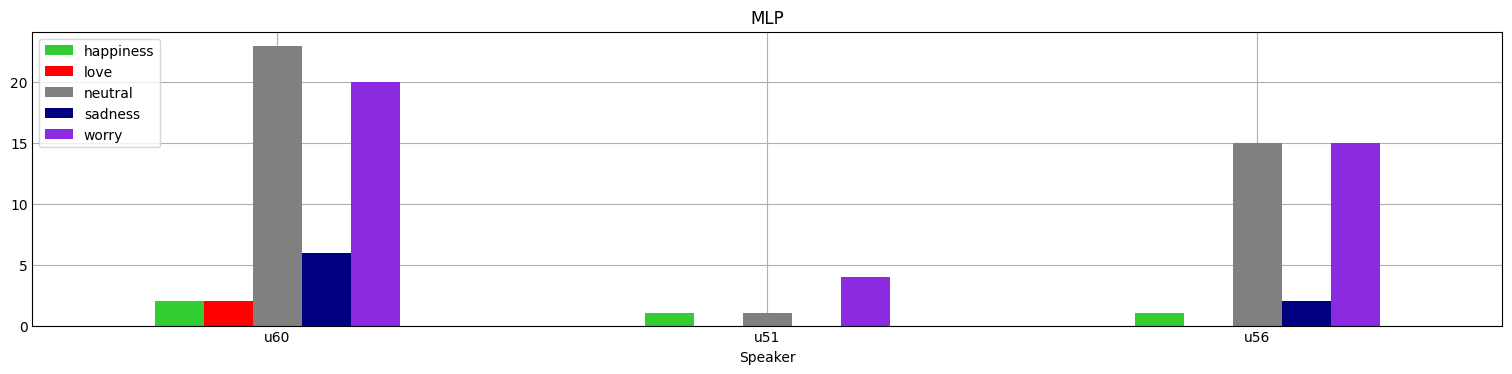

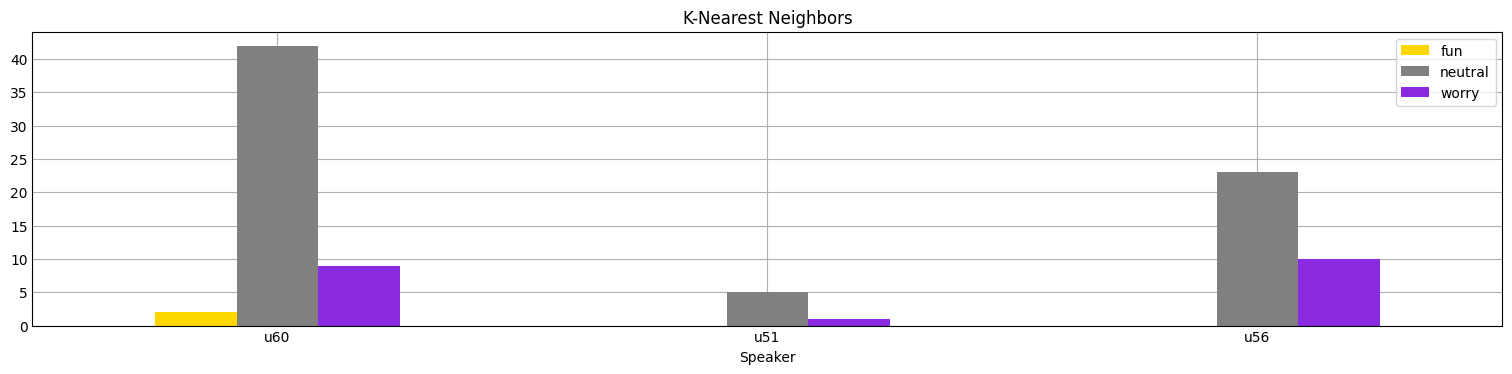

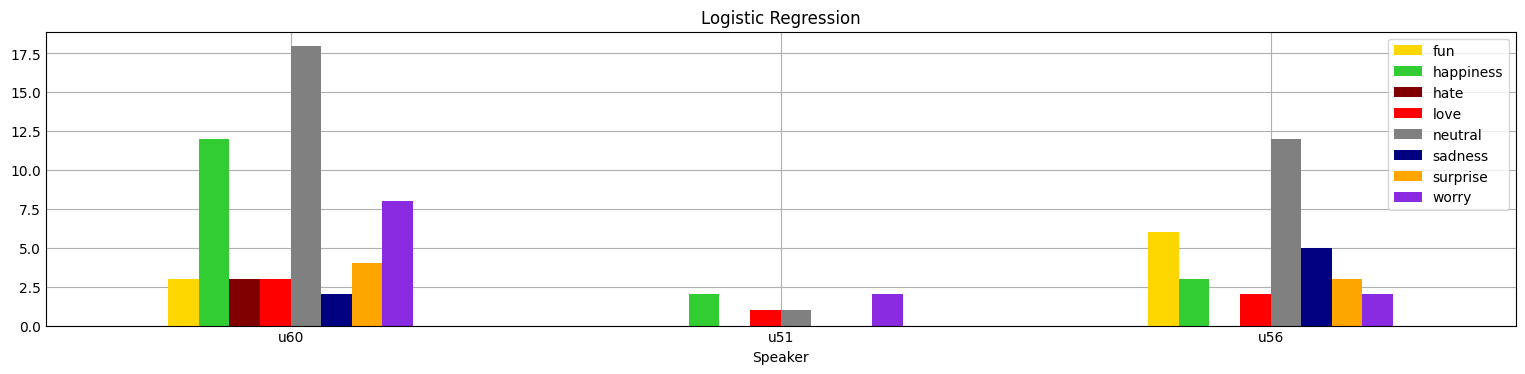

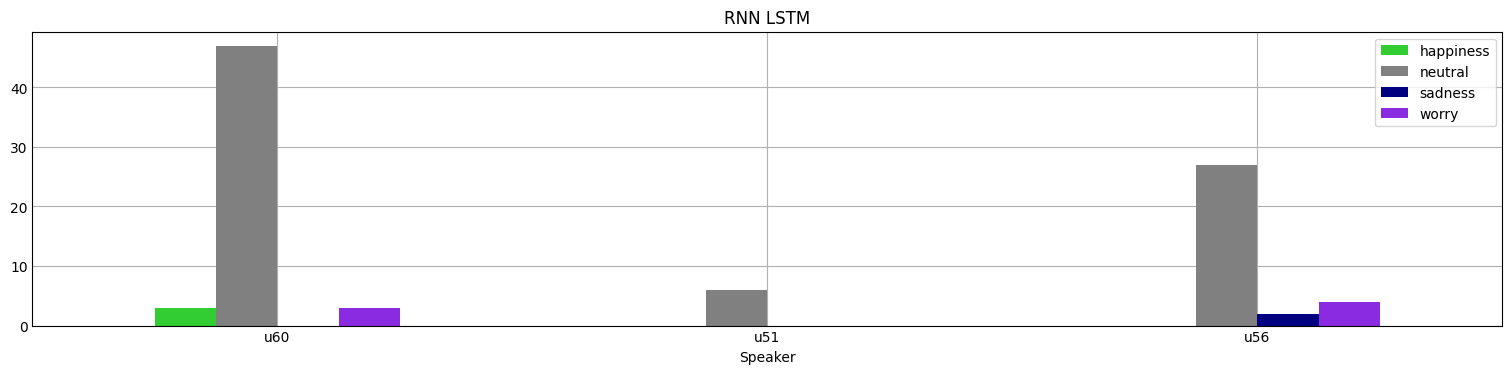

In [13]:
for n, i in enumerate(list(dataframe.columns)[9:]):
    speakers = ECI.keys()
    df = pd.DataFrame({
        "Speaker": speakers,
        'fun': [ECI[speaker][i][0] for speaker in speakers],
        'happiness': [ECI[speaker][i][1]  for speaker in speakers],
        'hate': [ECI[speaker][i][2] for speaker in speakers],
        'love': [ECI[speaker][i][3] for speaker in speakers],
        'neutral': [ECI[speaker][i][4] for speaker in speakers],
        'relief': [ECI[speaker][i][5] for speaker in speakers],
        'sadness': [ECI[speaker][i][6] for speaker in speakers],
        'surprise': [ECI[speaker][i][7] for speaker in speakers],
        'worry': [ECI[speaker][i][8] for speaker in speakers]
    })

    df = df.loc[:, (df != 0).any(axis=0)]
  
    y = [key for key in df.keys()[1:]]
    my_colors = [color(x) for x in y]

    df.plot(x="Speaker", y=y, kind="bar", rot=0, color=my_colors, figsize=(15,3), title = titles[n])

In [14]:
ECS = defaultdict(lambda: defaultdict(list))
for i, v in enumerate(np.array(character_interaction_df)):
    if v[3] == speaker_id and v[6] != None and v[6] == np.array(character_interaction_df)[i-1][0]:
        for k in list(dataframe.columns)[9:]:
            ECS[np.array(character_interaction_df)[i-1][5]][k].append(list(character_interaction_df.loc[character_interaction_df['id'] == v[0]][k])[0])
    if v[3] == speaker_id and i<len(np.array(character_interaction_df))-1 and np.array(character_interaction_df)[i+1][6] == v[0]:
        for k in list(dataframe.columns)[9:]:
            ECS[np.array(character_interaction_df)[i+1][5]][k].append(list(character_interaction_df.loc[character_interaction_df['id'] == v[0]][k])[0])

In [15]:
for k, v in ECS.items():
    for k1, v1 in v.items():
        ECS[k][k1] = Counter(v1)

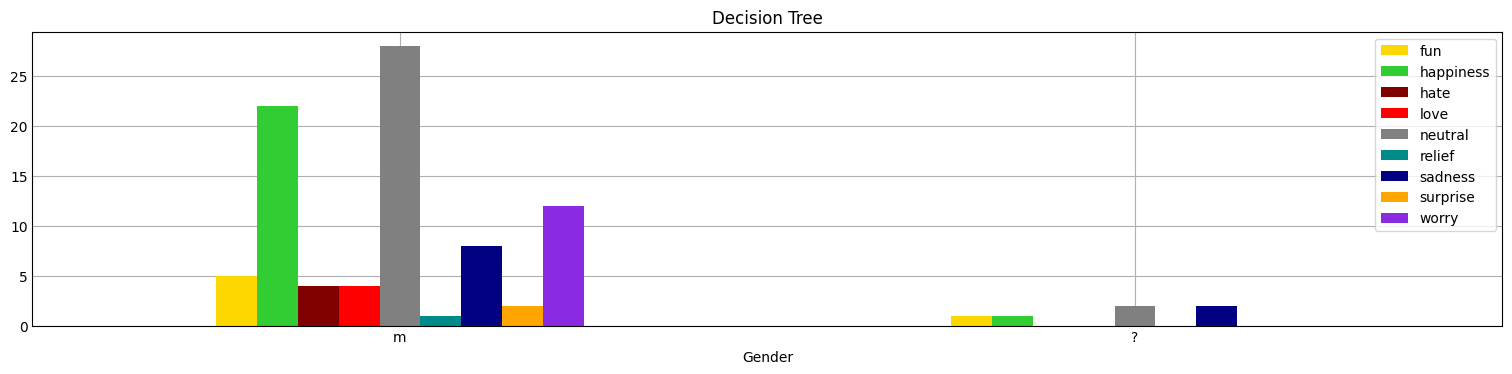

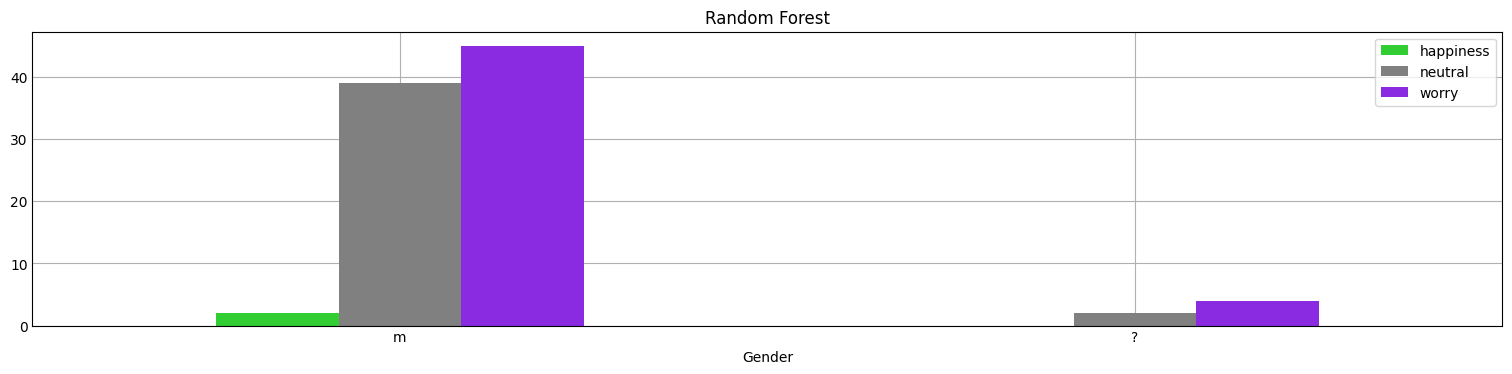

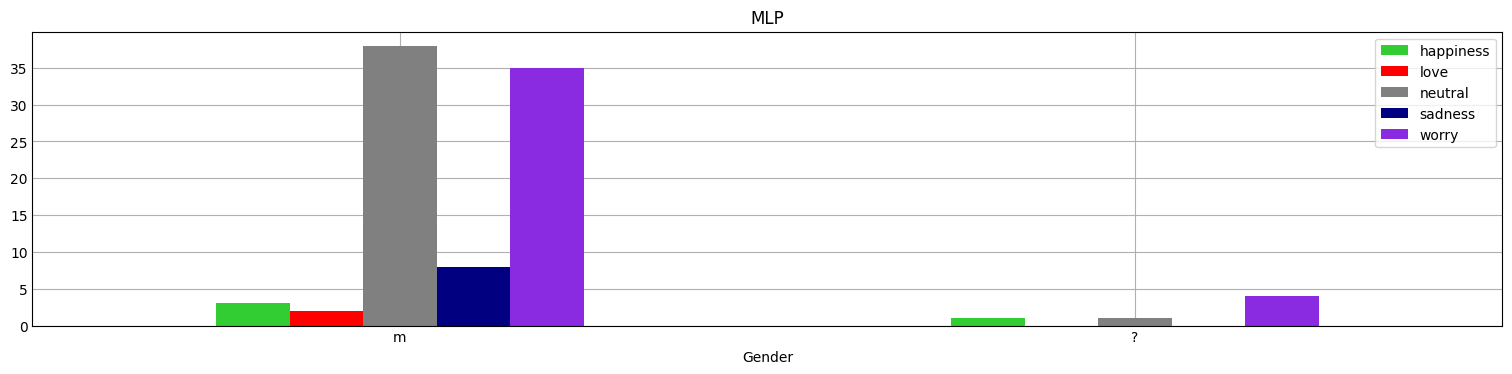

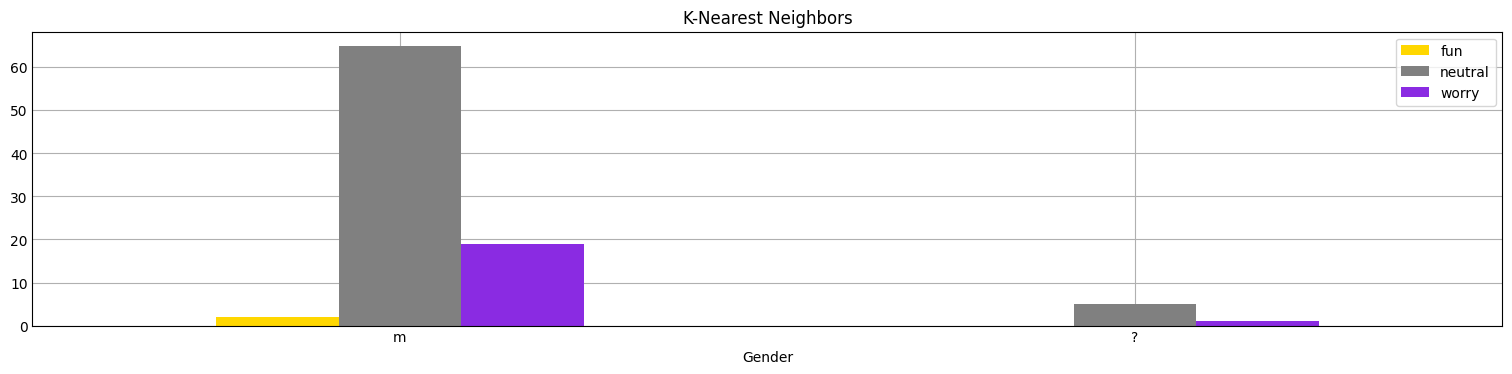

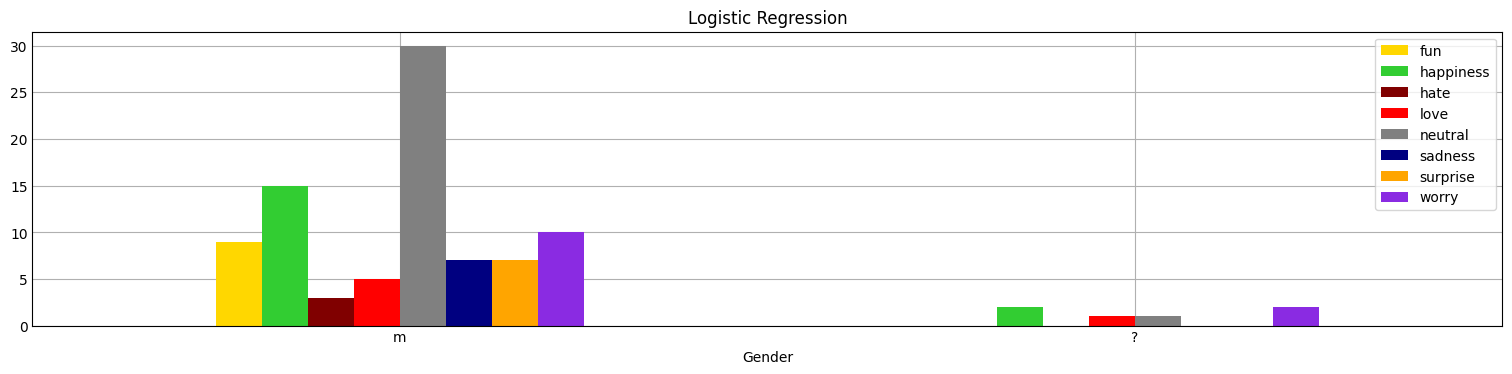

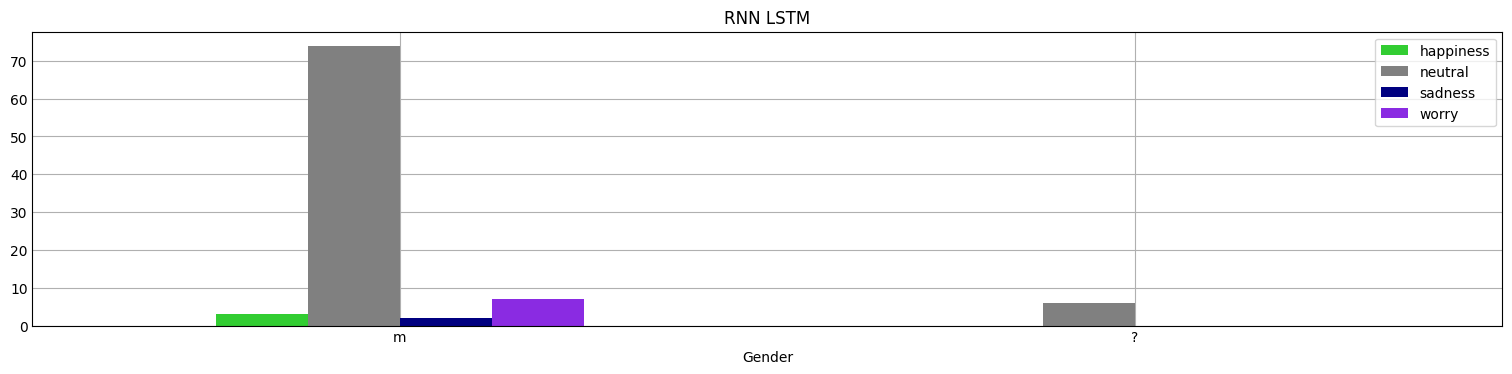

In [16]:
for n, i in enumerate(list(dataframe.columns)[9:]):
    genders = ECS.keys()
    df = pd.DataFrame({
        "Gender": genders,
        'fun': [ECS[gender][i][0]  for gender in genders],
        'happiness': [ECS[gender][i][1] for gender in genders],
        'hate': [ECS[gender][i][2] for gender in genders],
        'love': [ECS[gender][i][3] for gender in genders],
        'neutral': [ECS[gender][i][4] for gender in genders],
        'relief': [ECS[gender][i][5] for gender in genders],
        'sadness': [ECS[gender][i][6] for gender in genders],
        'surprise': [ECS[gender][i][7] for gender in genders],
        'worry': [ECS[gender][i][8] for gender in genders]
    })

    df = df.loc[:, (df != 0).any(axis=0)]
  
    y = [key for key in df.keys()[1:]]
    my_colors = [color(x) for x in y]

    df.plot(x="Gender", y=y, kind="bar", rot=0, color=my_colors, figsize=(15,3), title=titles[n])